Problem Statement:  

For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, using the historical data from 2007 to 2015, you have to build a deep learning model to predict the chance of default for future loans. As you will see later this dataset is highly imbalanced and includes a lot of features that makes this problem more challenging.

Domain: Finance

Analysis to be done: Perform data preprocessing and build a deep learning prediction model. 

Content: 

Dataset columns and definition:

 

credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

installment: The monthly installments owed by the borrower if the loan is funded.

log.annual.inc: The natural log of the self-reported annual income of the borrower.

dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

fico: The FICO credit score of the borrower.

days.with.cr.line: The number of days the borrower has had a credit line.

revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.

delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

 

Steps to perform:

Perform exploratory data analysis and feature engineering and then apply feature engineering. Follow up with a deep learning model to predict whether or not the loan will be default using the historical data.

 

Tasks:

1.     Feature Transformation

Transform categorical values into numerical values (discrete)

2.     Exploratory data analysis of different factors of the dataset.

3.     Additional Feature Engineering

You will check the correlation between features and will drop those features which have a strong correlation

This will help reduce the number of features and will leave you with the most relevant features

4.     Modeling

After applying EDA and feature engineering, you are now ready to build the predictive models

In this part, you will create a deep learning model using Keras with Tensorflow backend

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [180]:
#  import the file
loan_df = pd.read_csv('loan_data.csv')

In [181]:
loan_df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [182]:
loan_df.shape

(9578, 14)

In [183]:
loan_df.size

134092

In [184]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [185]:
# checking missing values
loan_df.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

**There is no missing value**

In [186]:
loan_df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [187]:
# import pandas_profiling import ProfileReport
# !pip install pandas-profiling

In [188]:
# ProfileReport(loan_df)

# Tasks:


## 2.Exploratory data analysis of different factors of the dataset.

In [189]:
# which purpose of the loan is highly paid or not
df = loan_df.groupby(['purpose'])['not.fully.paid'].value_counts().to_frame()
df

not.fully.paid
purpose            not.fully.paid                
all_other          0                         1944
                   1                          387
credit_card        0                         1116
                   1                          146
debt_consolidation 0                         3354
                   1                          603
educational        0                          274
                   1                           69
home_improvement   0                          522
                   1                          107
major_purchase     0                          388
                   1                           49
small_business     0                          447
                   1                          172

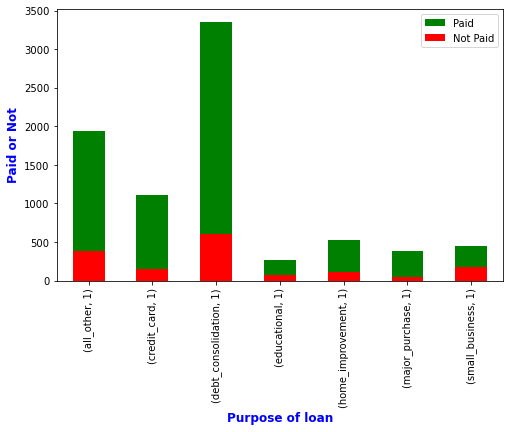

In [190]:
plt.figure(figsize=(8,5))
loan_df[loan_df['not.fully.paid']==0].groupby(['purpose'])['not.fully.paid'].value_counts().plot(kind='bar', color='g')
loan_df[loan_df['not.fully.paid']==1].groupby(['purpose'])['not.fully.paid'].value_counts().plot(kind='bar', color='r')
plt.xlabel('Purpose of loan',color='blue',size = 12,weight='bold')
plt.ylabel('Paid or Not',color='blue',size = 12, weight='bold')
plt.legend(['Paid','Not Paid'])
plt.show()

**FICO Score Ratings**

Exceptional	800 to 850
Very Good	740 to 799
Good	670 to 739
Fair	580 to 669
Very Poor	300 to 579

As per FICO score ratings we define the other column

In [191]:
loan_df['fico_ratings'] = pd.cut(loan_df['fico'], bins=[300,579,669,739,799,850], labels = ['Very Poor', 'Fair', 'Good', 'Very Good', 'Exceptional'])

In [192]:
loan_df['fico_ratings'].unique()

['Good', 'Fair', 'Very Good', 'Exceptional']
Categories (4, object): ['Fair' < 'Good' < 'Very Good' < 'Exceptional']

<AxesSubplot:xlabel='fico_ratings'>

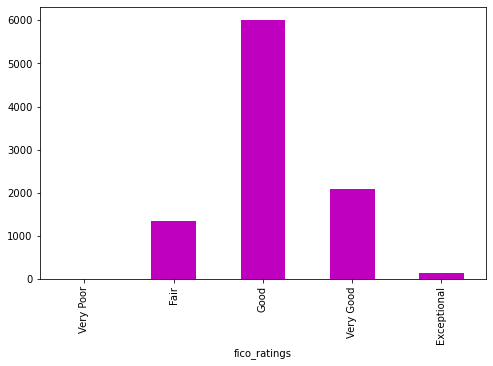

In [193]:
plt.figure(figsize=(8,5))

loan_df.groupby(['fico_ratings'])['fico'].count().plot(kind='bar', color='m')

### Mostly fico score in good ranking

## 1.Feature Transformation
Transform categorical values into numerical values (discrete)

In [194]:
# Encoding the data which is object or category

purpose_df = pd.get_dummies(loan_df['purpose'])
purpose_df

,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
9573,1,0,0,0,0,0,0
9574,1,0,0,0,0,0,0
9575,0,0,1,0,0,0,0
9576,0,0,0,0,1,0,0


In [195]:
loan_df1 = pd.concat([purpose_df, loan_df],axis=1)
loan_df1 = loan_df1.drop(['purpose','fico_ratings'],axis=1)
loan_df1.head()

,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,0,0,1,0,0,0,0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,0,1,0,0,0,0,0,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,0,0,1,0,0,0,0,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,0,0,1,0,0,0,0,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,0,1,0,0,0,0,0,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Outliers check

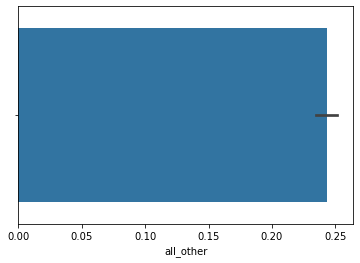

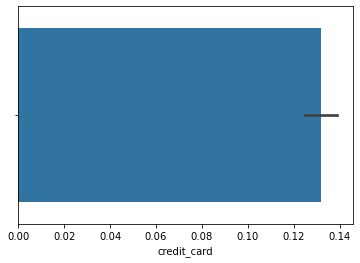

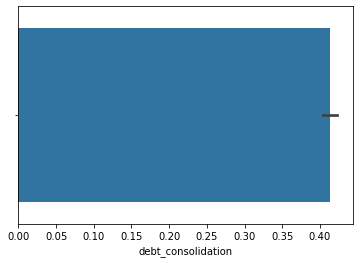

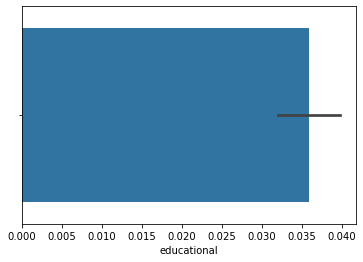

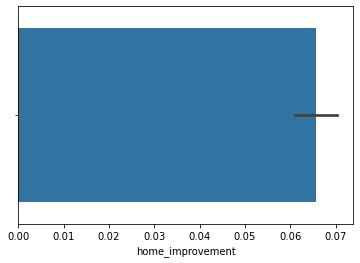

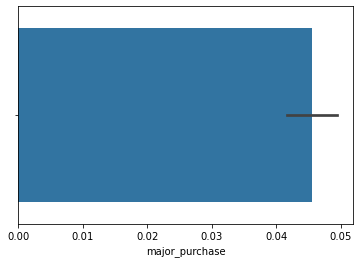

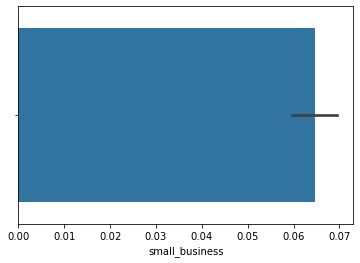

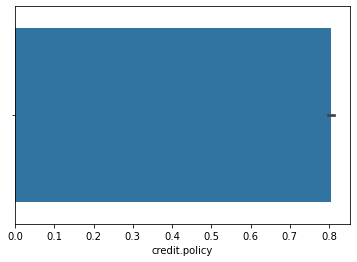

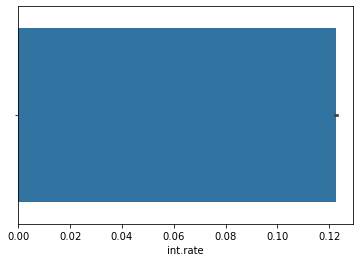

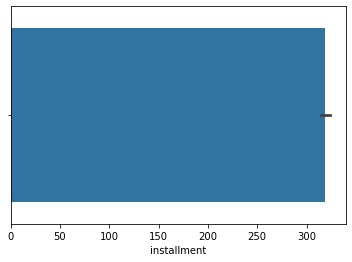

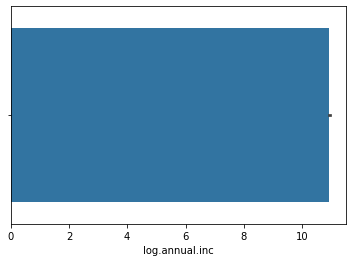

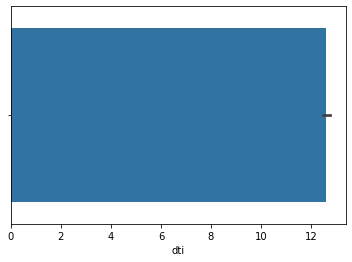

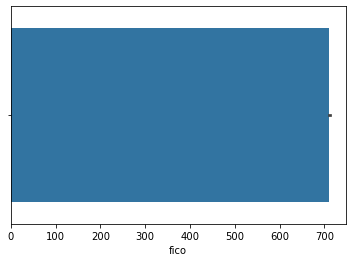

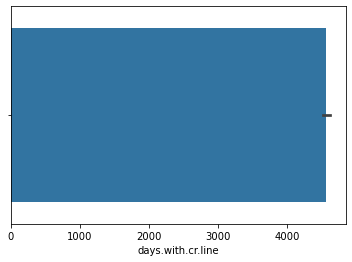

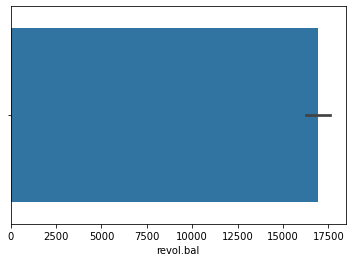

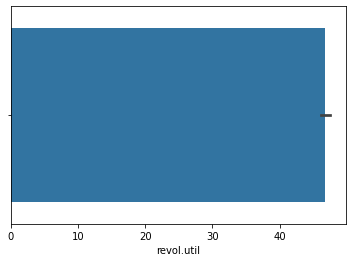

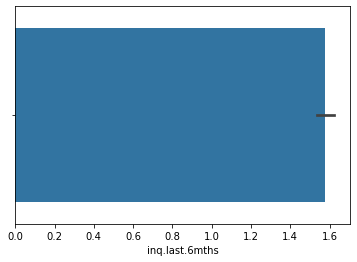

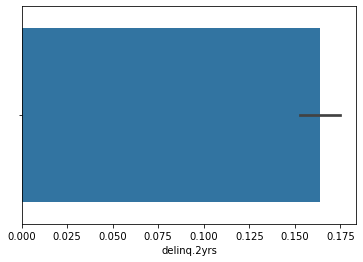

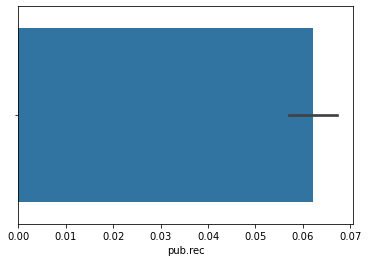

In [196]:
for col in loan_df1.drop('not.fully.paid', axis=1).columns:
    plt.figure(figsize=(6,4))
    sns.barplot(x=loan_df1[col], data = loan_df1)
    plt.show()

**No Outliers found**

## 3.Additional Feature Engineering

You will check the correlation between features and will drop those features which have a strong correlation

This will help reduce the number of features and will leave you with the most relevant features

<AxesSubplot:>

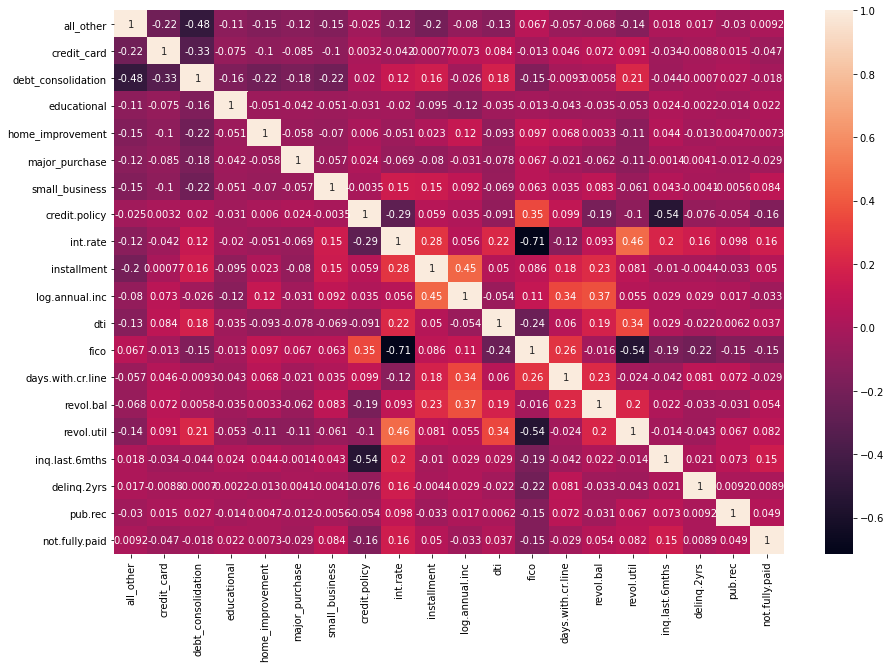

In [197]:
# coorelation of data
plt.figure(figsize=(15,10))
sns.heatmap(loan_df1.corr(),annot=True)

1. Credit policy and Inq.last.6mnths are inversely corelatted
2. int.rate and fico are inversely corelatted
3. fico and revol.util are inversely corelatted

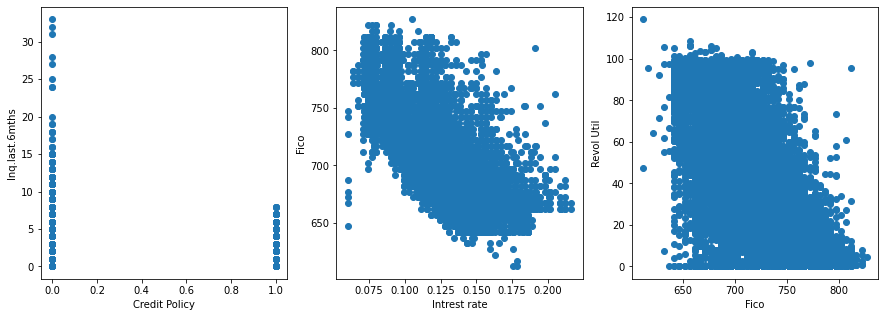

In [198]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.scatter(loan_df1['credit.policy'],loan_df1['inq.last.6mths'])
plt.xlabel('Credit Policy')
plt.ylabel('Inq.last.6mths')

plt.subplot(1,3,2)
plt.scatter(loan_df1['int.rate'],loan_df1['fico'])
plt.xlabel('Intrest rate')
plt.ylabel('Fico')

plt.subplot(1,3,3)
plt.scatter(loan_df1['fico'],loan_df1['revol.util'])
plt.xlabel('Fico')
plt.ylabel('Revol Util')
plt.show()

## 4.Modeling
After applying EDA and feature engineering, you are now ready to build the predictive models

In this part, you will create a deep learning model using Keras with Tensorflow backend

In [199]:
# model creation

x = loan_df1.drop(['not.fully.paid'],axis = 1)
y = loan_df1['not.fully.paid']

In [200]:
x.shape, y.shape

((9578, 19), (9578,))

In [201]:
# Split the data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=88)

In [202]:
# Scaling the data
from sklearn.preprocessing import StandardScaler

std_sc = StandardScaler()

std_sc.fit(x_train)

x_train_sc = std_sc.transform(x_train)
x_test_sc = std_sc.transform(x_test)

In [203]:
# build network
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.metrics import Precision, Recall

In [210]:
model = Sequential()

# Hidden layer
model.add(Dense(20, activation='relu'))# 1st hidden layer
model.add(Dense(10, activation='relu'))# 2nd hidden layer
# model.add(Dense(20, activation='relu'))# 3rd hidden layer

# output layer
model.add(Dense(1,activation='sigmoid'))# activation sigmoid is used for binary classification

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [211]:
from livelossplot import PlotLossesKeras

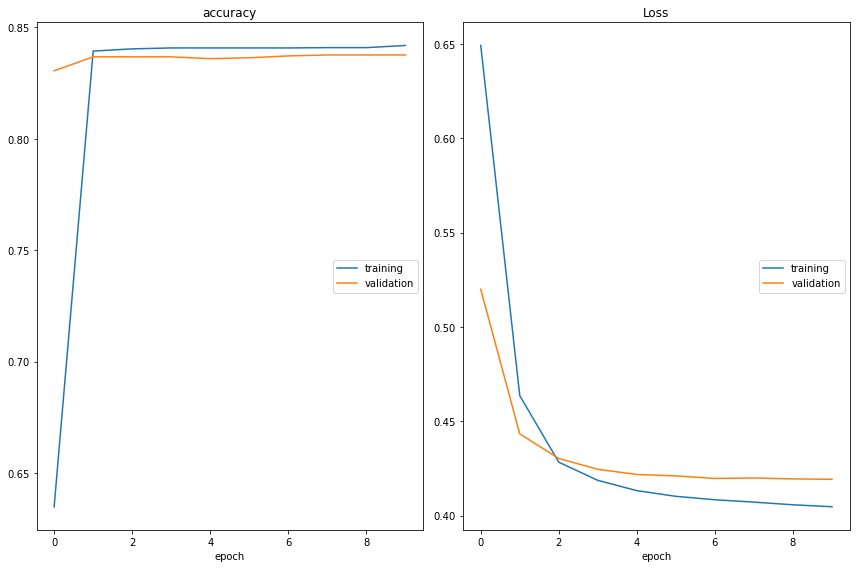

accuracy
	training         	 (min:    0.635, max:    0.842, cur:    0.842)
	validation       	 (min:    0.830, max:    0.838, cur:    0.838)
Loss
	training         	 (min:    0.405, max:    0.649, cur:    0.405)
	validation       	 (min:    0.419, max:    0.520, cur:    0.419)


In [212]:
model.fit(x_train_sc, y_train, epochs=10,batch_size=100, callbacks=[PlotLossesKeras()], validation_data=(x_test_sc,y_test))

In [213]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 20)                400       
_________________________________________________________________
dense_26 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 11        
Total params: 621
Trainable params: 621
Non-trainable params: 0
_________________________________________________________________
